In [1]:
import pandas as pd

df = pd.read_csv('./data/tiktok_dataset.csv')
df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_column = 'video_transcription_text'
numeric_columns = [
    'video_view_count',
    'video_like_count',
    'video_share_count',
    'video_download_count',
    'video_comment_count'
]

In [3]:
df[text_column] = df[text_column].fillna('')

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
result_df = pd.concat([tfidf_df, df[numeric_columns].reset_index(drop=True)],axis=1)

In [4]:
result_df

,000,100,11,12,13,14,15,150,17,170,...,yellowstone,you,your,zealanders,zones,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,343296.0,19425.0,241.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,140877.0,77355.0,19034.0,1161.0,684.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,902185.0,97690.0,2858.0,833.0,329.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,437506.0,239954.0,34812.0,1234.0,584.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
19378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
19379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
19380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
result_df.dropna(inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

X = result_df.iloc[:,0:1000]
y = result_df.iloc[:,1001]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state = 42)

In [7]:
print(X_train.shape, X_val.shape, X_test.shape)

(12165, 1000) (4056, 1000) (2863, 1000)


In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

def evaluate_model(model, X_val, y_val):
  y_pred = model.predict(X_val)
  rmse = np.sqrt(mean_squared_error(y_val, y_pred))
  r2 = r2_score(y_val, y_pred)
  print(f"{model.__class__.__name__} RMSE: {rmse}")
  print(f"{model.__class__.__name__} R2 Score: {r2}")

In [9]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
evaluate_model(knn, X_val, y_val)

KNeighborsRegressor RMSE: 117750.52225136063
KNeighborsRegressor R2 Score: 0.24151873211975872


In [10]:
np.sqrt(np.mean((y_val - np.mean(y_train))**2))


135253.4980886974

In [11]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(X_train, y_train)
evaluate_model(knn, X_val, y_val)

KNeighborsRegressor RMSE: 116091.3378311452
KNeighborsRegressor R2 Score: 0.2627431649428055


In [12]:
neigh = [7,8,9,10,11,12]

for n in neigh:
  print(f"Neighbors: {n}")
  knn = KNeighborsRegressor(n_neighbors = n)
  knn.fit(X_train, y_train)
  evaluate_model(knn, X_val, y_val)

Neighbors: 7
KNeighborsRegressor RMSE: 116613.02305348226
KNeighborsRegressor R2 Score: 0.2561021840254051
Neighbors: 8
KNeighborsRegressor RMSE: 116091.3378311452
KNeighborsRegressor R2 Score: 0.2627431649428055
Neighbors: 9
KNeighborsRegressor RMSE: 116365.76731608092
KNeighborsRegressor R2 Score: 0.2592534273557474
Neighbors: 10
KNeighborsRegressor RMSE: 116786.93905944341
KNeighborsRegressor R2 Score: 0.25388163937730046
Neighbors: 11
KNeighborsRegressor RMSE: 117818.64424197297
KNeighborsRegressor R2 Score: 0.24064087274587842
Neighbors: 12
KNeighborsRegressor RMSE: 118251.08084651972
KNeighborsRegressor R2 Score: 0.23505640330878463


In [13]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
evaluate_model(dt, X_val, y_val)

DecisionTreeRegressor RMSE: 150315.42152839023
DecisionTreeRegressor R2 Score: -0.23602215038385688


In [14]:
dt.tree_.max_depth

220

In [15]:
depth = [7,8,9,10]
for d in depth:
  print(f"Depth: {d}")
  dt = DecisionTreeRegressor(max_depth = d)
  dt.fit(X_train, y_train)
  evaluate_model(dt, X_val, y_val)

Depth: 7
DecisionTreeRegressor RMSE: 107818.2243979501
DecisionTreeRegressor R2 Score: 0.364078473772555
Depth: 8
DecisionTreeRegressor RMSE: 107211.37027049571
DecisionTreeRegressor R2 Score: 0.37121688761099814
Depth: 9
DecisionTreeRegressor RMSE: 107541.73328399127
DecisionTreeRegressor R2 Score: 0.367335830412331
Depth: 10
DecisionTreeRegressor RMSE: 107869.44446258227
DecisionTreeRegressor R2 Score: 0.36347412921651445


Text(0, 0.5, 'total impurity of leaves')

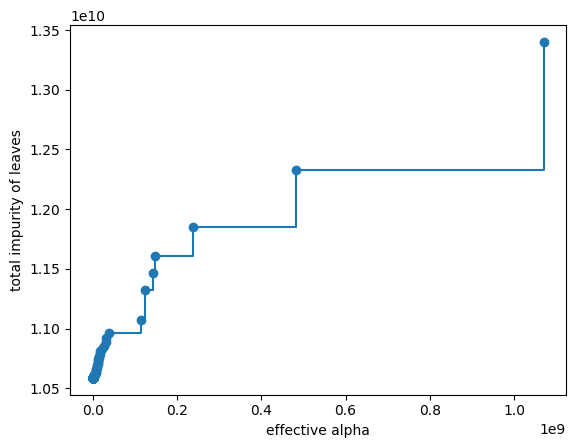

In [16]:
import matplotlib.pyplot as plt

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [17]:
dts = []

for ccp_alpha in ccp_alphas:
  dt = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
  dt.fit(X_train, y_train)
  dts.append(dt)

tree_depths = [dts.tree_.max_depth for dts in dts]
plt.plot(ccp_alphas[:-1], tree_depths)
plt.xlabel("effective alpha")
plt.ylabel("depth of tree")
#

KeyboardInterrupt: 

In [ ]:
r2_score = [dt.score(X_val, y_val) for dt in dts]

tree_depths = [dt.tree_.max_depth for dt in dts]
plt.plot(ccp_alphas[:-1], r2_score)
plt.xlabel("effective alpha")
plt.ylabel("R2 score")
#

In [9]:
rf = RandomForestRegressor(n_estimators=100, max_features=25, max_depth=None, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_val, y_val)

RandomForestRegressor RMSE: 111425.41267332294
RandomForestRegressor R2 Score: 0.3208156378708418


In [ ]:
rf.oob_score_

0.300113329725469

In [ ]:
ada = AdaBoostRegressor(n_estimators=100, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)
evaluate_model(ada, X_val, y_val)

In [ ]:
svm = SVR(C=1.0)
svm.fit(X_train, y_train)
evaluate_model(svm, X_val, y_val)

In [ ]:

evaluate_model(dt, X_test, y_test)

DecisionTreeRegressor RMSE: 105956.38108623645
DecisionTreeRegressor R2 Score: 0.36091674533892026


In [ ]:
SVR, AdaBoostRegressor, RandomForestRegressor, DecisionTreeRegressor, KNeighborsRegressor